##  FOOD DELIVERY TIME PREDICTION USING ... 

### Distance formula and fuction to calculate distance from latitude and longitude

In [1]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return(c * r)

### importing files as pandas dataframe

In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
df["Distance"] = df.apply(lambda x: distance(x["Restaurant_latitude"],x["Delivery_location_latitude"],x["Restaurant_longitude"],x["Delivery_location_longitude"]),axis= 1)

In [4]:
d = ["Restaurant_longitude","Delivery_person_ID","Restaurant_latitude","Delivery_location_latitude","Delivery_location_longitude","Order_Date","Time_Orderd",'Time_Order_picked']

In [5]:
for i in d:
    df = df.drop(i,axis = 1)

In [6]:
col = df.columns
col

Index(['ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)', 'Distance'],
      dtype='object')

In [7]:
for i in col:
    if(df[i].dtype == 'object'):
        df[i] = df[i].astype(str)
        df[i] = df[i].str.strip()        

## Time taken

In [8]:
df["time"] = df['Time_taken(min)'].apply(lambda x: x[6:])

## converting Dtype to float

In [9]:
intcol = [ "Delivery_person_Age",'Delivery_person_Ratings','Vehicle_condition','multiple_deliveries','Distance']
for i in intcol:
    df[i] = df[i].astype(str).astype(float)

In [10]:
total = df.isnull().sum().sort_values(ascending=False)
total

Delivery_person_Ratings    1908
Delivery_person_Age        1854
multiple_deliveries         993
ID                            0
Weatherconditions             0
Road_traffic_density          0
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
Festival                      0
City                          0
Time_taken(min)               0
Distance                      0
time                          0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
total

ID                         0
Delivery_person_Age        0
Delivery_person_Ratings    0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken(min)            0
Distance                   0
time                       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt

## 1.  Weatherconditions 

In [14]:
df['Weather'] = df['Weatherconditions'].apply(lambda x: x[11:])
print(df["Weather"].unique())
w = {'Sunny':0, 'Stormy':2, 'Sandstorms':4, 'Cloudy':0, 'Fog':3, 'Windy':1}
df['Weather'] = df['Weather'].map(w) 
print("\nNull values in Weather column ",df['Weather'].isnull().sum())
for (i,j) in w.items():
    print(j,"-",i)

['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy' 'NaN']

Null values in Weather column  91
0 - Sunny
2 - Stormy
4 - Sandstorms
0 - Cloudy
3 - Fog
1 - Windy


## 2.  Road_traffic_density

In [15]:
print(df["Road_traffic_density"].unique())
t = {"Low": 0, "Medium": 1,"High" : 2, "Jam" : 3}
df["Traffic"] = df["Road_traffic_density"].map(t)
print("\nNull values in Traffic column ",df['Traffic'].isnull().sum())
for (i,j) in t.items():
    print(j,"-",i)

['High' 'Jam' 'Low' 'Medium' 'NaN']

Null values in Traffic column  91
0 - Low
1 - Medium
2 - High
3 - Jam


## 3. Type_of_order

In [16]:
print(df['Type_of_order'].unique())
t = {'Snack':1, 'Drinks':0, 'Buffet':3, 'Meal':2}
df['Type_of_order'] = df['Type_of_order'].map(t)
print("\nNull values in Type_of_order column ",df['Type_of_order'].isnull().sum())
for (i,j) in t.items():
    print(j,"-",i)

['Snack' 'Drinks' 'Buffet' 'Meal']

Null values in Type_of_order column  0
1 - Snack
0 - Drinks
3 - Buffet
2 - Meal


## 4. Type_of_vehicle

In [17]:
print(df["Type_of_vehicle"].unique())
v = {'motorcycle' : 3,'scooter' : 2,'electric_scooter' : 1,'bicycle' : 0}
df["vehicle"] = df["Type_of_vehicle"].map(v)
print("\nNull values in vehicle column ",df['vehicle'].isnull().sum())
for (i,j) in v.items():
    print(j,"-",i)

['motorcycle' 'scooter' 'electric_scooter' 'bicycle']

Null values in vehicle column  0
3 - motorcycle
2 - scooter
1 - electric_scooter
0 - bicycle


## 5. Festival

In [18]:
#print(df["Festival"].unique())
f = {"No": 0, "Yes": 1}
df ["Festival_bin"] = df["Festival"].map(f)
print("\nNull values in Festival_bin column ",df['Festival_bin'].isnull().sum())
for (i,j) in f.items():
    print(j,"-",i)


Null values in Festival_bin column  208
0 - No
1 - Yes


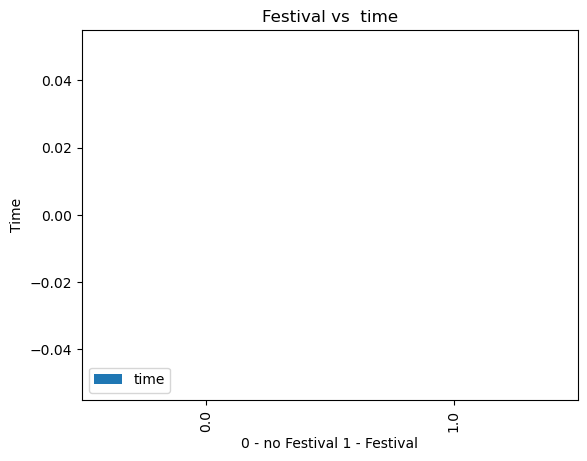

In [19]:
df[['Festival_bin','time']].groupby(['Festival_bin']).mean().plot.bar()
plt.title("Festival vs  time")
plt.ylabel('Time')
plt.xlabel("0 - no Festival 1 - Festival")
plt.show()

## 6. City

In [20]:
print(df["City"].unique())
c = {'Semi-Urban':0,'Urban':1,'Metropolitian':2}
df['City'] = df['City'].map(c)
print("\nNull values in City column ",df['City'].isnull().sum())
for (i,j) in c.items():
    print(j,"-",i)

['Urban' 'Metropolitian' 'Semi-Urban' 'NaN']

Null values in City column  1104
0 - Semi-Urban
1 - Urban
2 - Metropolitian


## 6. time

In [21]:
df["time"] = df['Time_taken(min)'].apply(lambda x: x[6:])
df["time"] = df["time"].astype(str).astype(int)
df.corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,Type_of_order,multiple_deliveries,City,Distance,time,Weather,Traffic,vehicle,Festival_bin
Delivery_person_Age,1.000000,-0.066546,0.003611,0.005298,0.115949,0.053967,0.041243,0.298119,-0.007064,0.001529,-0.004401,0.058074
Delivery_person_Ratings,-0.066546,1.000000,0.033631,0.000572,-0.117647,-0.049241,-0.001626,-0.338246,-0.031215,-0.069045,-0.017213,-0.059786
Vehicle_condition,0.003611,0.033631,1.000000,-0.006974,-0.102925,-0.028734,0.054714,-0.242838,-0.001206,0.011059,-0.633887,-0.084321
Type_of_order,0.005298,0.000572,-0.006974,1.000000,-0.002970,0.004451,-0.005591,0.005111,0.000196,0.000708,0.006441,-0.002811
multiple_deliveries,0.115949,-0.117647,-0.102925,-0.002970,1.000000,0.051576,-0.003823,0.388254,0.018240,0.161393,0.067574,0.142128
City,0.053967,-0.049241,-0.028734,0.004451,0.051576,1.000000,-0.003515,0.148695,0.016406,0.057790,0.015483,0.003509
Distance,0.041243,-0.001626,0.054714,-0.005591,-0.003823,-0.003515,1.000000,-0.005431,0.000839,0.001226,-0.038381,-0.000734
time,0.298119,-0.338246,-0.242838,0.005111,0.388254,0.148695,-0.005431,1.000000,0.064788,0.417415,0.152911,0.291123
Weather,-0.007064,-0.031215,-0.001206,0.000196,0.018240,0.016406,0.000839,0.064788,1.000000,0.001881,0.000242,-0.003277
Traffic,0.001529,-0.069045,0.011059,0.000708,0.161393,0.057790,0.001226,0.417415,0.001881,1.000000,-0.006622,0.122358


In [22]:
df.isnull().sum()

ID                            0
Delivery_person_Age           0
Delivery_person_Ratings       0
Weatherconditions             0
Road_traffic_density          0
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries           0
Festival                      0
City                       1104
Time_taken(min)               0
Distance                      0
time                          0
Weather                      91
Traffic                      91
vehicle                       0
Festival_bin                208
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.isnull().sum()

ID                         0
Delivery_person_Age        0
Delivery_person_Ratings    0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken(min)            0
Distance                   0
time                       0
Weather                    0
Traffic                    0
vehicle                    0
Festival_bin               0
dtype: int64

In [25]:
df.corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,Type_of_order,multiple_deliveries,City,Distance,time,Weather,Traffic,vehicle,Festival_bin
Delivery_person_Age,1.000000,-0.114824,0.001101,0.007579,0.114877,0.053179,0.001453,0.297270,-0.006669,0.001146,-0.001914,0.058782
Delivery_person_Ratings,-0.114824,1.000000,0.044343,0.001947,-0.125098,-0.052789,-0.003143,-0.359866,-0.029990,-0.068713,-0.025538,-0.062310
Vehicle_condition,0.001101,0.044343,1.000000,-0.005315,-0.101605,-0.027817,0.002538,-0.241702,0.000457,0.010025,-0.633257,-0.085538
Type_of_order,0.007579,0.001947,-0.005315,1.000000,-0.003443,0.004190,0.003582,0.004380,0.000665,-0.000872,0.005163,-0.003740
multiple_deliveries,0.114877,-0.125098,-0.101605,-0.003443,1.000000,0.049926,0.001036,0.385257,0.017844,0.160169,0.066861,0.142618
City,0.053179,-0.052789,-0.027817,0.004190,0.049926,1.000000,-0.002384,0.146029,0.015909,0.056934,0.015387,0.003298
Distance,0.001453,-0.003143,0.002538,0.003582,0.001036,-0.002384,1.000000,-0.001078,0.000391,0.002097,0.002914,-0.006528
time,0.297270,-0.359866,-0.241702,0.004380,0.385257,0.146029,-0.001078,1.000000,0.063321,0.419287,0.153057,0.291264
Weather,-0.006669,-0.029990,0.000457,0.000665,0.017844,0.015909,0.000391,0.063321,1.000000,0.002672,0.000295,-0.002462
Traffic,0.001146,-0.068713,0.010025,-0.000872,0.160169,0.056934,0.002097,0.419287,0.002672,1.000000,-0.006373,0.123092


In [26]:
df = df.dropna() # 1, 2, 3, 5,8,9,

## 1. weather condiotions

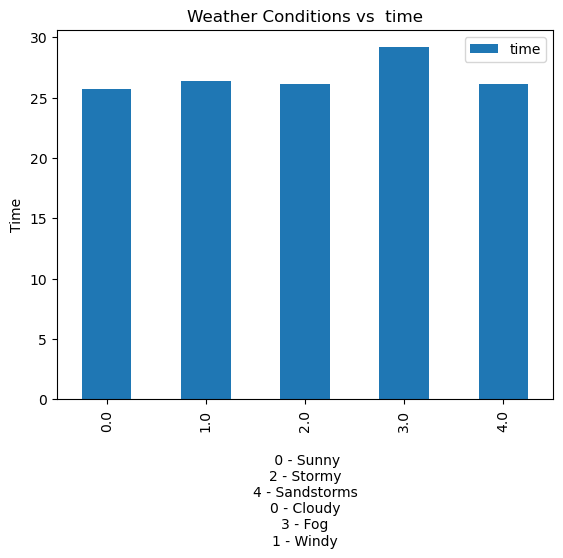

In [27]:
df[['time','Weather']].groupby(['Weather']).mean().plot.bar()
plt.title("Weather Conditions vs  time")
plt.ylabel('Time')
plt.xlabel(""" \n 0 - Sunny
2 - Stormy
4 - Sandstorms
0 - Cloudy
3 - Fog
1 - Windy""")
plt.show()

## 2. Traffic

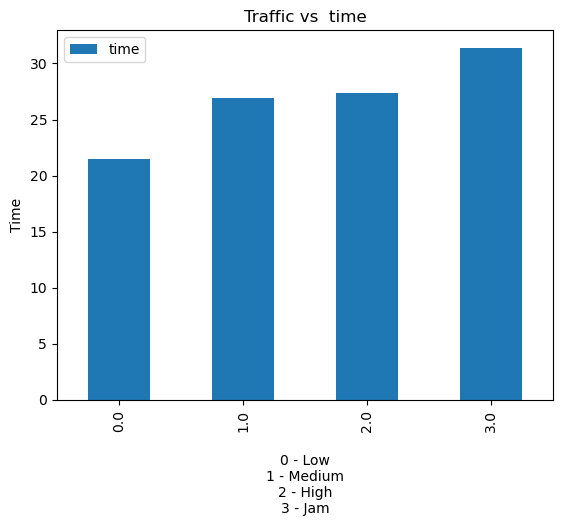

In [28]:
df[['Traffic','time']].groupby(['Traffic']).mean().plot.bar()
plt.title("Traffic vs  time")
plt.ylabel('Time')
plt.xlabel(""" \n0 - Low
1 - Medium
2 - High
3 - Jam""")
plt.show()

## 3. type of order

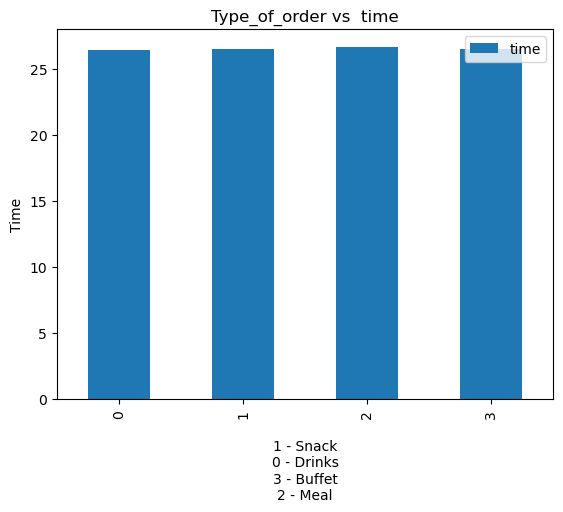

In [29]:
df[['Type_of_order','time']].groupby(['Type_of_order']).mean().plot.bar()
plt.title("Type_of_order vs  time")
plt.ylabel('Time')
plt.xlabel(''' \n1 - Snack
0 - Drinks
3 - Buffet
2 - Meal''')
plt.show()

## 4. Type of vehivle

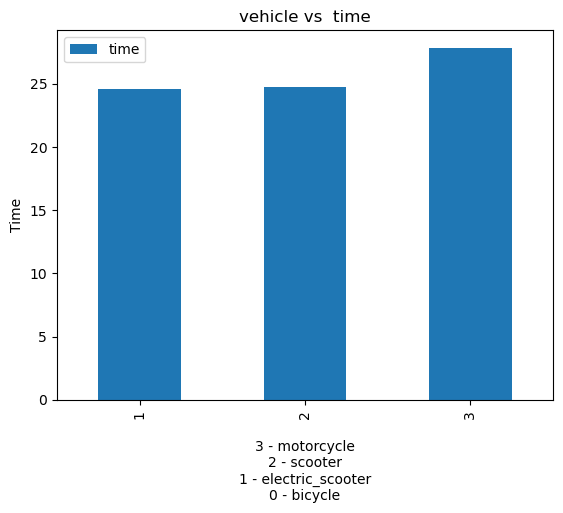

In [30]:
df[['vehicle','time']].groupby(['vehicle']).mean().plot.bar()
plt.title("vehicle vs  time")
plt.ylabel('Time')
plt.xlabel('''\n3 - motorcycle
2 - scooter
1 - electric_scooter
0 - bicycle''')
plt.show()

## 6.  City

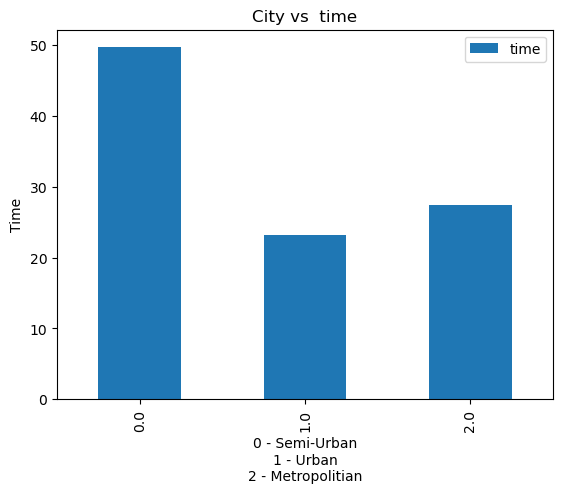

In [32]:
df[['City','time']].groupby(['City']).mean().plot.bar()
plt.title("City vs  time")
plt.ylabel('Time')
plt.xlabel("""0 - Semi-Urban
1 - Urban
2 - Metropolitian""")
plt.show()

In [ ]:
x = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'Type_of_order', 'multiple_deliveries', 'City', 'Distance',
       'Weather', 'Traffic', 'vehicle', 'Festival_bin']]
y = df['time']

In [ ]:
x =df[ ['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition','multiple_deliveries','Traffic','vehicle','Festival_bin']]
y = df['time']

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,)    

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression( )
mlr.fit( x_train, y_train) # regression line fitting
y_pred = mlr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

## Randomforest regrwsssior

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(x, y)
y_pred = rfr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) * 100
  

In [ ]:
## Result plotting

In [ ]:
df.corr()